In [251]:
# insert Libreries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

In [2]:
 conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [98]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [99]:
Df_train= pd.read_csv(r'C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 18\House Price-CapstoneII\\train.csv')

In [100]:
Df_train.head


<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [101]:
Df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [102]:
Df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:

#exploring the number of missing values in each column
cols=Df_train.columns
nans=[]

for col in cols:
    nans.append(Df_train[col].isnull().sum())
    
print (nans)



[0, 0, 0, 259, 0, 0, 1369, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 37, 37, 38, 37, 0, 38, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 690, 81, 81, 81, 0, 0, 81, 81, 0, 0, 0, 0, 0, 0, 0, 1453, 1179, 1406, 0, 0, 0, 0, 0, 0]


In [104]:
missing= zip(cols,nans)
print(set(missing))

{('SaleCondition', 0), ('BsmtFinSF2', 0), ('2ndFlrSF', 0), ('Fireplaces', 0), ('LotConfig', 0), ('OpenPorchSF', 0), ('YearBuilt', 0), ('PoolArea', 0), ('ExterCond', 0), ('LotFrontage', 259), ('Exterior1st', 0), ('BsmtCond', 37), ('GarageType', 81), ('1stFlrSF', 0), ('ScreenPorch', 0), ('HouseStyle', 0), ('3SsnPorch', 0), ('OverallQual', 0), ('BsmtHalfBath', 0), ('GarageArea', 0), ('FullBath', 0), ('OverallCond', 0), ('PavedDrive', 0), ('LowQualFinSF', 0), ('PoolQC', 1453), ('BsmtFinType1', 37), ('GarageCond', 81), ('KitchenAbvGr', 0), ('Street', 0), ('MSZoning', 0), ('HalfBath', 0), ('Fence', 1179), ('YrSold', 0), ('MoSold', 0), ('GarageCars', 0), ('Functional', 0), ('KitchenQual', 0), ('MiscFeature', 1406), ('GarageYrBlt', 81), ('ExterQual', 0), ('BsmtExposure', 38), ('TotalBsmtSF', 0), ('MSSubClass', 0), ('LotArea', 0), ('EnclosedPorch', 0), ('Neighborhood', 0), ('Alley', 1369), ('YearRemodAdd', 0), ('GrLivArea', 0), ('SaleType', 0), ('BedroomAbvGr', 0), ('Heating', 0), ('BldgType', 

In [105]:
# Dropped three columns due to the high Missing Values

Df_train= Df_train.drop(['Fence','MiscFeature','Alley'],axis=1)

In [106]:
Df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [107]:
# Replacing Nans with Zero

Df_train=Df_train.fillna(0)

In [108]:
# check to ensure we have no nan values left in the data frame

colsII=Df_train.columns

nansII=[]

for col in colsII:
    nansII.append(Df_train[col].isnull().sum())
    
print (nansII)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [109]:
# get the list of columns with Object Data Type

objcols=Df_train.select_dtypes('object').columns
print(objcols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition'],
      dtype='object')


In [110]:
for col in objcols:
    print (col,':', len (Df_train[col].unique()),':', Df_train[col].unique())
    

MSZoning : 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : 2 : ['Pave' 'Grvl']
LotShape : 4 : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : 2 : ['AllPub' 'NoSeWa']
LotConfig : 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3 : ['Gtl' 'Mod' 'Sev']
Neighborhood : 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : 6 : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : 8 : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'T

In [111]:
#1.Zoning

MSZoningII=Df_train['MSZoning'].unique()
count=1
Rep={}
for data in MSZoningII:
    Rep[data]=count
    count+=1

Df_train['MSZoning']=Df_train['MSZoning'].replace(Rep)

#2.Street
StreetII=Df_train['Street'].unique()
count=1
Rep={}
for data in StreetII:
    Rep[data]=count
    count+=1

Df_train['Street']=Df_train['Street'].replace(Rep)

#3.Lot Shape
LotShapeII=Df_train['LotShape'].unique()
count=1
Rep={}
for data in LotShapeII:
    Rep[data]=count
    count+=1

Df_train['LotShape']=Df_train['LotShape'].replace(Rep)

#4.LandContour
LandContourII=Df_train['LandContour'].unique()
count=1
Rep={}
for data in LandContourII:
    Rep[data]=count
    count+=1

Df_train['LandContour']=Df_train['LandContour'].replace(Rep)

#5.Lot Configuration

LotConfigII=Df_train['LotConfig'].unique()
count=1
Rep={}
for data in LotConfigII:
    Rep[data]=count
    count+=1

Df_train['LotConfig']=Df_train['LotConfig'].replace(Rep)


#6.Land Slope

LandSlopeII=Df_train['LandSlope'].unique()
count=1
Rep={}
for data in LandSlopeII:
    Rep[data]=count
    count+=1

Df_train['LandSlope']=Df_train['LandSlope'].replace(Rep)

#7.Building type
BldgTypeII=Df_train['BldgType'].unique()
count=1
Rep={}
for data in BldgTypeII:
    Rep[data]=count
    count+=1

Df_train['BldgType']=Df_train['BldgType'].replace(Rep)

#8.Neighborhood

NeighborhoodII=Df_train['Neighborhood'].unique()
count=1
Rep={}
for data in NeighborhoodII:
    Rep[data]=count
    count+=1

Df_train['Neighborhood']=Df_train['Neighborhood'].replace(Rep)

#9.House Style

HouseStyleII=Df_train['HouseStyle'].unique()
count=1
Rep={}
for data in HouseStyleII:
    Rep[data]=count
    count+=1

Df_train['HouseStyle']=Df_train['HouseStyle'].replace(Rep)


#10.Roof Material

RoofMatlII=Df_train['RoofMatl'].unique()
count=1
Rep={}
for data in RoofMatlII:
    Rep[data]=count
    count+=1

Df_train['RoofMatl']=Df_train['RoofMatl'].replace(Rep)


#13.Roof Style

RoofStyleII=Df_train['RoofStyle'].unique()
count=1
Rep={}
for data in RoofStyleII:
    Rep[data]=count
    count+=1

Df_train['RoofStyle']=Df_train['RoofStyle'].replace(Rep)

#14. MasVnr Type

MasVnrTypeII=Df_train['MasVnrType'].unique()
count=1
Rep={}
for data in MasVnrTypeII:
    Rep[data]=count
    count+=1

Df_train['MasVnrType']=Df_train['MasVnrType'].replace(Rep)

#15.Foundation
FoundationII=Df_train['Foundation'].unique()
count=1
Rep={}
for data in FoundationII:
    Rep[data]=count
    count+=1

Df_train['Foundation']=Df_train['Foundation'].replace(Rep)

#15.Bsmt Exposure

BsmtExposureII=Df_train['BsmtExposure'].unique()
count=1
Rep={}
for data in BsmtExposureII:
    Rep[data]=count
    count+=1

Df_train['BsmtExposure']=Df_train['BsmtExposure'].replace(Rep)

#16.Heating
HeatingII=Df_train['Heating'].unique()
count=1
Rep={}
for data in HeatingII:
    Rep[data]=count
    count+=1

Df_train['Heating']=Df_train['Heating'].replace(Rep)
#17.Heating QC
HeatingQC=Df_train['HeatingQC'].unique()
count=1
Rep={}
for data in HeatingQC:
    Rep[data]=count
    count+=1

Df_train['HeatingQC']=Df_train['HeatingQC'].replace(Rep)

#18.Electrical

Electrical=Df_train['Electrical'].unique()
count=1
Rep={}
for data in Electrical:
    Rep[data]=count
    count+=1

Df_train['Electrical']=Df_train['Electrical'].replace(Rep)

#19.Funcational

Functional=Df_train['Functional'].unique()
count=1
Rep={}
for data in Functional:
    Rep[data]=count
    count+=1

Df_train['Functional']=Df_train['Functional'].replace(Rep)

#20. Garage Type
GarageType=Df_train['GarageType'].unique()
count=1
Rep={}
for data in GarageType:
    Rep[data]=count
    count+=1

Df_train['GarageType']=Df_train['GarageType'].replace(Rep)

#21. Sale Type
SaleType=Df_train['SaleType'].unique()
count=1
Rep={}
for data in SaleType:
    Rep[data]=count
    count+=1

Df_train['SaleType']=Df_train['SaleType'].replace(Rep)

#22. Sale Condition
SaleCondition=Df_train['SaleCondition'].unique()
count=1
Rep={}
for data in SaleCondition:
    Rep[data]=count
    count+=1

Df_train['SaleCondition']=Df_train['SaleCondition'].replace(Rep)


#23.Utilities
Utilities=Df_train['Utilities'].unique()
count=1
Rep={}
for data in Utilities:
    Rep[data]=count
    count+=1

Df_train['Utilities']=Df_train['Utilities'].replace(Rep)


In [112]:
for col in objcols:
    print (col,':', len (Df_train[col].unique()),':', Df_train[col].unique())
    

MSZoning : 5 : [1 2 3 4 5]
Street : 2 : [1 2]
LotShape : 4 : [1 2 3 4]
LandContour : 4 : [1 2 3 4]
Utilities : 2 : [1 2]
LotConfig : 5 : [1 2 3 4 5]
LandSlope : 3 : [1 2 3]
Neighborhood : 25 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 : 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 : [1 2 3 4 5]
HouseStyle : 8 : [1 2 3 4 5 6 7 8]
RoofStyle : 6 : [1 2 3 4 5 6]
RoofMatl : 8 : [1 2 3 4 5 6 7 8]
Exterior1st : 15 : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd : 16 : ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
MasVnrType : 5 : [1 2 3 4 5]
ExterQual : 4 : ['Gd' 'TA' 'Ex' 'Fa']
ExterCond : 5 : ['TA' 'Gd' '

In [113]:

Df_train['GarageQual']=Df_train['GarageQual'].astype(object)
Df_train['FireplaceQu']=Df_train['FireplaceQu'].astype(object)
Df_train['GarageCond']=Df_train['GarageCond'].astype(object)
Df_train['PoolQC']=Df_train['PoolQC'].astype(object)
Df_train['KitchenQual']=Df_train.KitchenQual.astype(object)
Df_train['KitchenQual']=Df_train.KitchenQual.astype(object)
Df_train['BsmtFinType1']=Df_train.BsmtFinType1.astype(object)
Df_train['BsmtFinType2']=Df_train.BsmtFinType2.astype(object)
Df_train['Condition1']=Df_train.Condition1.astype(object)
Df_train['Condition2']=Df_train.Condition2.astype(object)
Rep3={'TA':2,'Gd':4, 'Fa':3, 'Ex':5 ,'Po':1}
Rep4={'GLQ':6, 'ALQ':5,'Unf':1 ,'Rec':4, 'BLQ':3, 'LwQ':2}
Rep5={'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9}
#fireplace
Df_train['FireplaceQu']=Df_train['FireplaceQu'].replace(Rep3)
#Guarage
Df_train['GarageQual']=Df_train['GarageQual'].replace(Rep3)
Df_train['GarageCond']=Df_train['GarageCond'].replace(Rep3)
#Pool
Df_train['PoolQC']=Df_train['PoolQC'].replace(Rep3)
#Kitchen
Df_train['KitchenQual']=Df_train['KitchenQual'].replace(Rep3)
#BsmtFin
Df_train['BsmtFinType1']=Df_train['BsmtFinType1'].replace(Rep4)
Df_train['BsmtFinType2']=Df_train['BsmtFinType2'].replace(Rep4)

#Condition
Df_train['Condition1']=Df_train['Condition1'].replace(Rep5)
Df_train['Condition2']=Df_train['Condition2'].replace(Rep5)

In [114]:
Df_train['ExterQual']=Df_train.ExterQual.astype(object)
Df_train['ExterQual']=Df_train['ExterQual'].replace(Rep3)
Df_train['ExterCond']=Df_train.ExterCond.astype(object)
Df_train['ExterCond']=Df_train['ExterCond'].replace(Rep3)
Df_train['BsmtCond']=Df_train['BsmtCond'].astype(object)
Df_train['BsmtCond']=Df_train['BsmtCond'].replace(Rep3)
Df_train['BsmtQual']=Df_train['BsmtQual'].astype(object)
Df_train['BsmtQual']=Df_train['BsmtQual'].replace(Rep3)
Rep6={'VinylSd': 1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6 ,'CemntBd':7,
 'Plywood':8, 'AsbShng':9 ,'Stucco':10 ,'BrkComm':11 ,'AsphShn':12, 'Stone':13, 'ImStucc':14,
 'CBlock':15}
Rep7= {'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':8 ,'Wd Sdng':6, 'CmentBd':7,
 'BrkFace':5 ,'Stucco':10 ,'AsbShng':9 ,'Brk Cmn':11, 'ImStucc':14 ,'AsphShn':12 ,'Stone':13,
 'Other':16 ,'CBlock':15}
Df_train['Exterior1st']=Df_train['Exterior1st'].replace(Rep6)
Df_train['Exterior2nd']=Df_train['Exterior2nd'].replace(Rep7)

Rep8={'Y':1, 'N':0, 'P':0.5}
Df_train['PavedDrive']=Df_train['PavedDrive'].astype(object)
Df_train['PavedDrive']=Df_train['PavedDrive'].replace(Rep8)
Df_train['CentralAir']=Df_train['CentralAir'].replace(Rep8)
Rep9={'RFn':2 ,'Unf':1 ,'Fin':3}
Df_train['GarageFinish']=Df_train['GarageFinish'].replace(Rep9)


In [115]:
for col in objcols:
    print (col,':', len (Df_train[col].unique()),':', Df_train[col].unique())
    

MSZoning : 5 : [1 2 3 4 5]
Street : 2 : [1 2]
LotShape : 4 : [1 2 3 4]
LandContour : 4 : [1 2 3 4]
Utilities : 2 : [1 2]
LotConfig : 5 : [1 2 3 4 5]
LandSlope : 3 : [1 2 3]
Neighborhood : 25 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 : 9 : [1 2 3 4 5 6 7 8 9]
Condition2 : 8 : [1 4 6 2 3 8 7 5]
BldgType : 5 : [1 2 3 4 5]
HouseStyle : 8 : [1 2 3 4 5 6 7 8]
RoofStyle : 6 : [1 2 3 4 5 6]
RoofMatl : 8 : [1 2 3 4 5 6 7 8]
Exterior1st : 15 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Exterior2nd : 16 : [ 1  2  3  4  8  6  7  5 10  9 11 14 12 13 16 15]
MasVnrType : 5 : [1 2 3 4 5]
ExterQual : 4 : [4 2 5 3]
ExterCond : 5 : [2 4 3 1 5]
Foundation : 6 : [1 2 3 4 5 6]
BsmtQual : 5 : [4 2 5 0 3]
BsmtCond : 5 : [2 4 0 3 1]
BsmtExposure : 5 : [1 2 3 4 5]
BsmtFinType1 : 7 : [6 5 1 4 3 0 2]
BsmtFinType2 : 7 : [1 3 0 5 4 2 6]
Heating : 6 : [1 2 3 4 5 6]
HeatingQC : 5 : [1 2 3 4 5]
CentralAir : 2 : [1 0]
Electrical : 6 : [1 2 3 4 5 6]
KitchenQual : 4 : 

In [116]:
Df_train.head

<bound method NDFrame.head of         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         1         65.0     8450       1         1   
1        2          20         1         80.0     9600       1         1   
2        3          60         1         68.0    11250       1         2   
3        4          70         1         60.0     9550       1         2   
4        5          60         1         84.0    14260       1         2   
...    ...         ...       ...          ...      ...     ...       ...   
1455  1456          60         1         62.0     7917       1         1   
1456  1457          20         1         85.0    13175       1         1   
1457  1458          70         1         66.0     9042       1         1   
1458  1459          20         1         68.0     9717       1         1   
1459  1460          20         1         75.0     9937       1         1   

      LandContour  Utilities  LotConfig  ...  3SsnPorch  

In [117]:
from scipy.stats import spearmanr

corr, _ = spearmanr(Df_train['BsmtQual'],Df_train['BsmtCond'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.143


In [118]:
corr, _ = spearmanr(Df_train['BsmtFinType1'],Df_train['BsmtFinType2'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.172


In [119]:
corr, _ = spearmanr(Df_train['Condition1'],Df_train['Condition2'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.258


In [120]:
#ax = sns.heatmap(Df_train, vmin=-0.5, vmax=0.5,
                 #fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 #square=True, cmap=plt.cm.Blues)

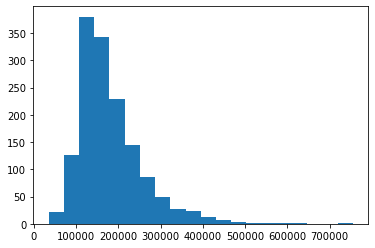

In [154]:
# check the distribution of the "Sale Price"

_=plt.hist(Df_train['SalePrice'], bins=20)

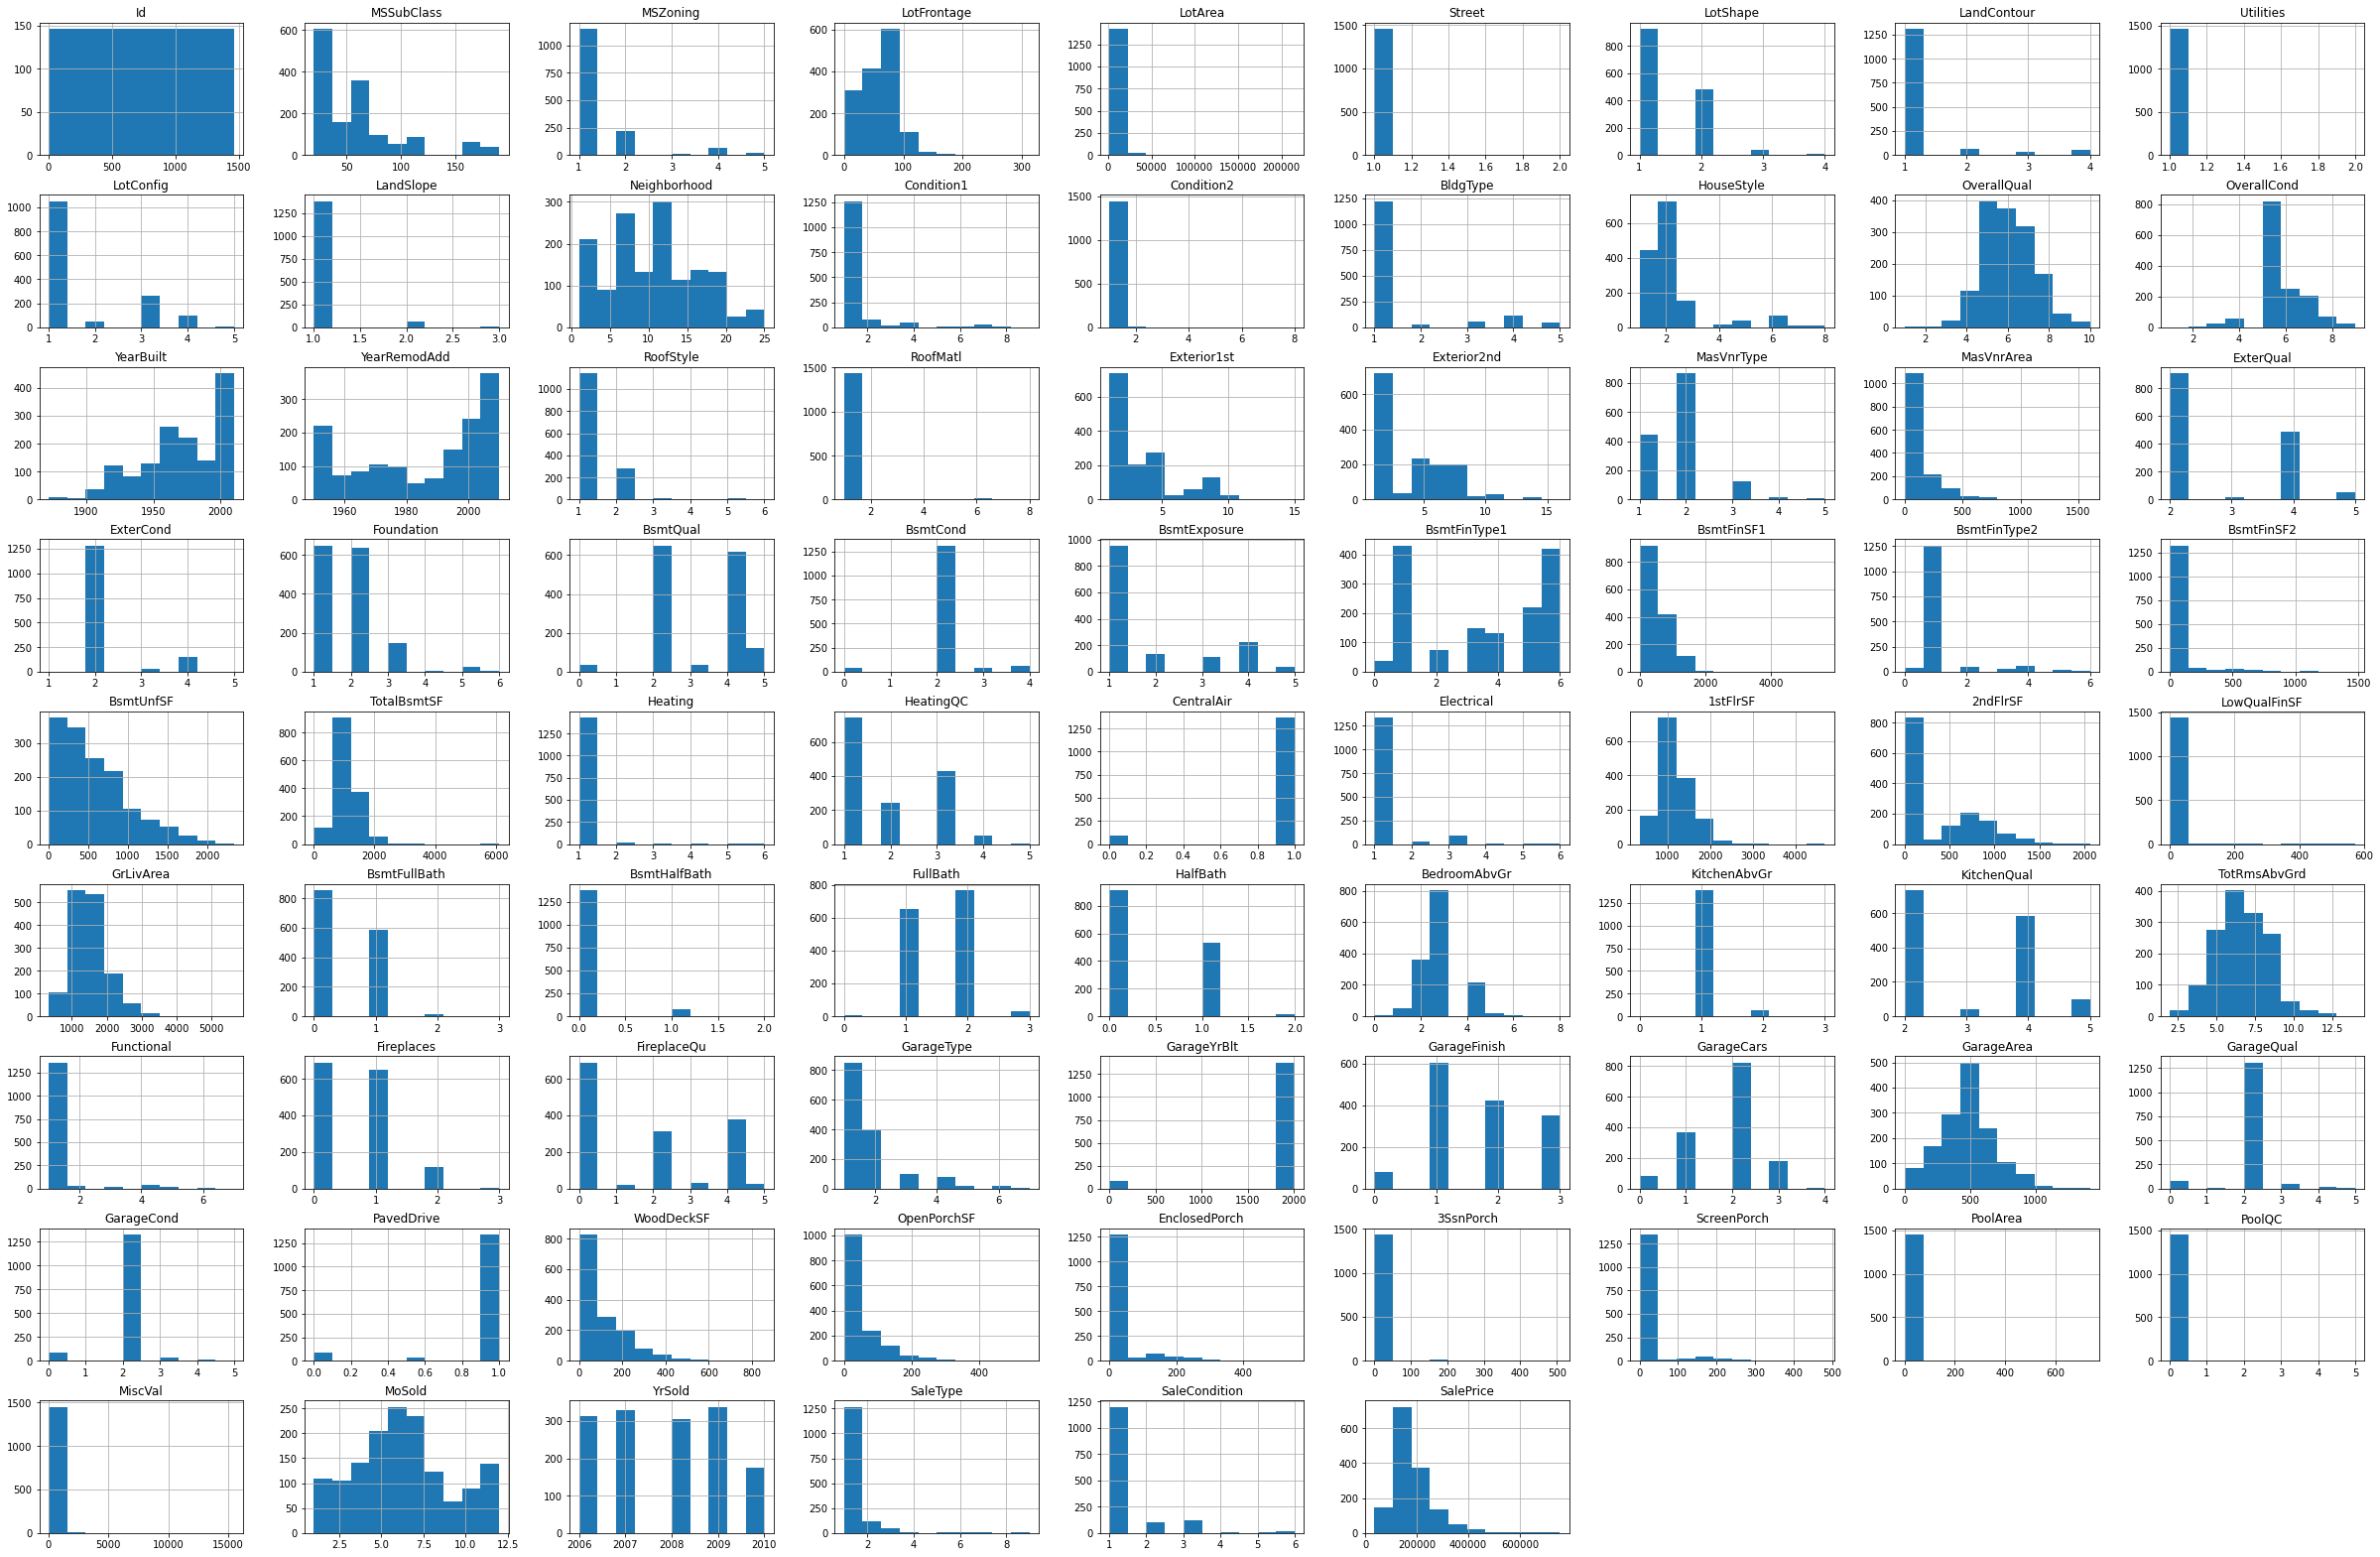

In [163]:

Df_train.hist()
      
N = 7
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
plt.show()

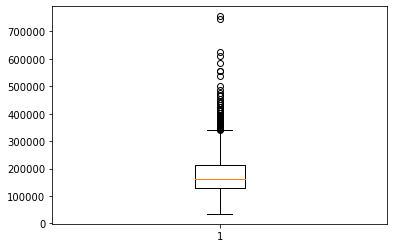

In [165]:
# check the outliers

_=plt.boxplot(Df_train['SalePrice'])

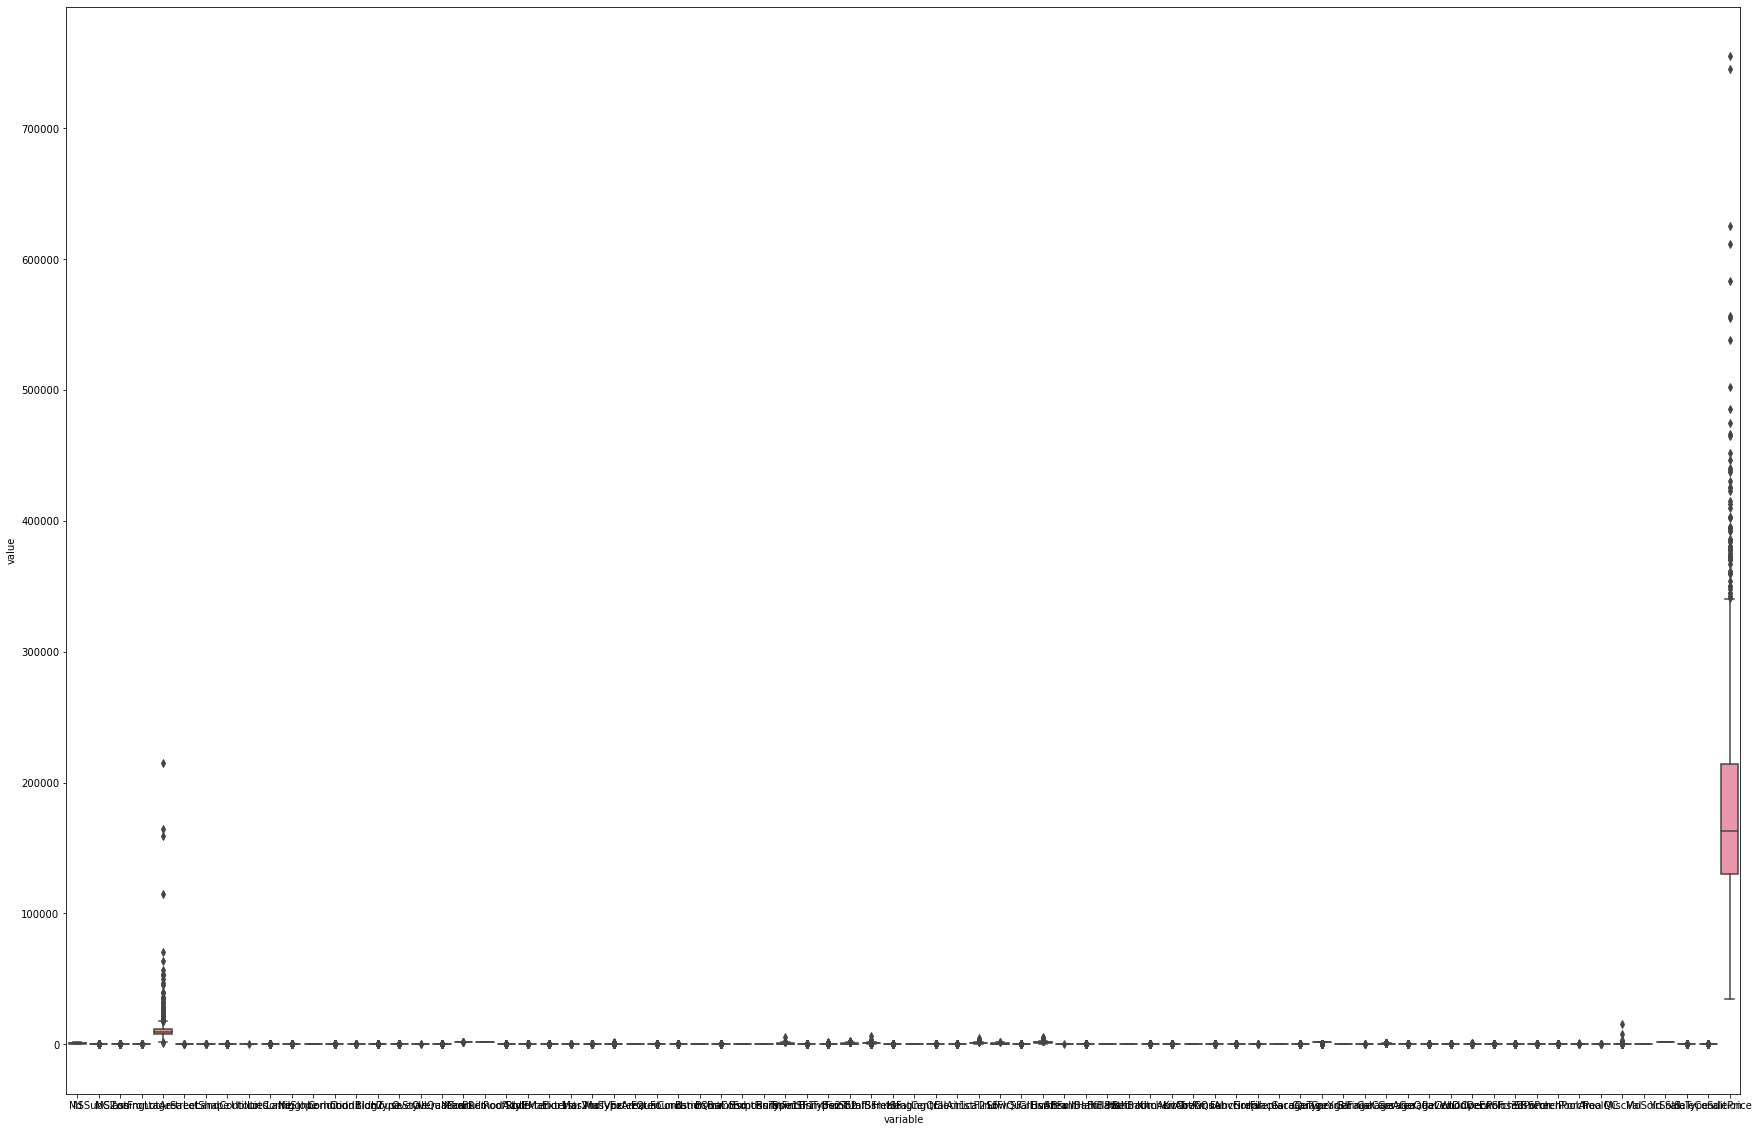

In [252]:
sns.boxplot(x="variable", y="value", data=pd.melt(Df_train))
N = 5
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
plt.show()

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [192]:
y= Df_train['SalePrice']
X= Df_train.drop(['SalePrice'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [260]:
# using Robust Scaler to reduce the influence of Outliers. The best next Scaler would be MINMAX Scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
Xtr_r = robust_scaler.fit_transform(X_train)
Xtr_r = robust_scaler.fit_transform(X_train)
Xte_r = robust_scaler.fit_transform(X_test)
ytr_r=robust_scaler.fit_transform(y_train.values.reshape(-1,1))
yte_r = robust_scaler.fit_transform(y_test.values.reshape(-1,1))

In [200]:
#xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

In [201]:
#xg_reg.fit(X_train, y_train)

In [202]:
xgb_model = xgb.XGBRegressor()

In [203]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [204]:
xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(Xtr_r,ytr_r)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   17.5s finished


0.846946099049463
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [205]:
xgb_model= xgb.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 5, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1,subsample= 0.7, seed=123)

In [237]:
xgb_model.fit(Xtr_r,ytr_r)
y_pred=xgb_model.predict(Xte_r)
# Scale Y_pred
ypred_r = robust_scaler.fit_transform(y_pred.reshape(-1,1))
rmse = np.sqrt(MSE(yte_r, ypred_r))
print("RMSE: %f" % (rmse))

RMSE: 0.290178


In [247]:
# compute Rsquare and adjusted R spuare with formulas from the theory

SS_Residual = np.sum(np.square(yte_r-ypred_r)) 
print("SS residual: %f" % SS_Residual)
SS_Total = sum((yte_r-np.mean(yte_r))**2)
print("SS Total: %f" % SS_Total)
r_squared =1 - (SS_Residual)/SS_Total
print("r_squared: %f" % r_squared)
adjusted_r_squared = 1 - (1-r_squared)*(len(yte_r)-1)/(len(yte_r)-Xte_r.shape[1]-1)
print ("adjusted_r_squared: %f" % adjusted_r_squared)

SS residual: 24.587295
SS Total: 249.750530
r_squared: 0.901553
adjusted_r_squared: 0.866130


In [261]:
yrand= Df_train['SaleCondition']
Xrand= Df_train.drop(['SaleCondition'],axis=1)
Xrand_train, Xrand_test, yrand_train, yrand_test= train_test_split(Xrand, yrand, test_size=0.2, random_state=123)

classes= ['Normal', 'Abnorml' ,'Partial' ,'AdjLand' ,'Alloca' ,'Family']

from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(Xrand_train)
Xrand_train_scaled=scaler.transform(Xrand_train)
Xrand_test_scaled=scaler.transform(Xrand_test)

In [270]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(Xrand_train_scaled, yrand_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [271]:
yrand_pred = model_res.predict(Xrand_test_scaled)
yrand_pred_prob = model_res.predict_proba(Xrand_test_scaled)


NameError: name 'model_res' is not defined

In [272]:
lr_probs = yrand_pred_prob[:,1]
ac = accuracy_score(yrand_test, yrand_pred)

f1 = f1_score(yrand_test, yrand_pred, average='weighted')
cm = confusion_matrix(yrand_test, yrand_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

NameError: name 'yrand_pred_prob' is not defined

In [138]:
Df_test= pd.read_csv(r'C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 18\House Price-CapstoneII\\test.csv')

In [139]:
Df_test.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Util

In [140]:
# Replacing Nans with Zero
Df_test=Df_test.fillna(0)

# Dropped three columns due to the high Missing Values
Df_test= Df_test.drop(['Fence','MiscFeature','Alley'],axis=1)
Df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [141]:
#1.Zoning

MSZoningII=Df_test['MSZoning'].unique()
count=1
Rep={}
for data in MSZoningII:
    Rep[data]=count
    count+=1

Df_test['MSZoning']=Df_test['MSZoning'].replace(Rep)

#2.Street
StreetII=Df_test['Street'].unique()
count=1
Rep={}
for data in StreetII:
    Rep[data]=count
    count+=1

Df_test['Street']=Df_test['Street'].replace(Rep)

#3.Lot Shape
LotShapeII=Df_test['LotShape'].unique()
count=1
Rep={}
for data in LotShapeII:
    Rep[data]=count
    count+=1

Df_test['LotShape']=Df_test['LotShape'].replace(Rep)

#4.LandContour
LandContourII=Df_test['LandContour'].unique()
count=1
Rep={}
for data in LandContourII:
    Rep[data]=count
    count+=1

Df_test['LandContour']=Df_test['LandContour'].replace(Rep)

#5.Lot Configuration

LotConfigII=Df_test['LotConfig'].unique()
count=1
Rep={}
for data in LotConfigII:
    Rep[data]=count
    count+=1

Df_test['LotConfig']=Df_test['LotConfig'].replace(Rep)


#6.Land Slope

LandSlopeII=Df_test['LandSlope'].unique()
count=1
Rep={}
for data in LandSlopeII:
    Rep[data]=count
    count+=1

Df_test['LandSlope']=Df_test['LandSlope'].replace(Rep)

#7.Building type
BldgTypeII=Df_test['BldgType'].unique()
count=1
Rep={}
for data in BldgTypeII:
    Rep[data]=count
    count+=1

Df_test['BldgType']=Df_test['BldgType'].replace(Rep)

#8.Neighborhood

NeighborhoodII=Df_test['Neighborhood'].unique()
count=1
Rep={}
for data in NeighborhoodII:
    Rep[data]=count
    count+=1

Df_test['Neighborhood']=Df_test['Neighborhood'].replace(Rep)

#9.House Style

HouseStyleII=Df_test['HouseStyle'].unique()
count=1
Rep={}
for data in HouseStyleII:
    Rep[data]=count
    count+=1

Df_test['HouseStyle']=Df_test['HouseStyle'].replace(Rep)


#10.Roof Material

RoofMatlII=Df_test['RoofMatl'].unique()
count=1
Rep={}
for data in RoofMatlII:
    Rep[data]=count
    count+=1

Df_test['RoofMatl']=Df_test['RoofMatl'].replace(Rep)


#13.Roof Style

RoofStyleII=Df_test['RoofStyle'].unique()
count=1
Rep={}
for data in RoofStyleII:
    Rep[data]=count
    count+=1

Df_test['RoofStyle']=Df_test['RoofStyle'].replace(Rep)

#14. MasVnr Type

MasVnrTypeII=Df_test['MasVnrType'].unique()
count=1
Rep={}
for data in MasVnrTypeII:
    Rep[data]=count
    count+=1

Df_test['MasVnrType']=Df_test['MasVnrType'].replace(Rep)

#15.Foundation
FoundationII=Df_test['Foundation'].unique()
count=1
Rep={}
for data in FoundationII:
    Rep[data]=count
    count+=1

Df_test['Foundation']=Df_test['Foundation'].replace(Rep)

#15.Bsmt Exposure

BsmtExposureII=Df_test['BsmtExposure'].unique()
count=1
Rep={}
for data in BsmtExposureII:
    Rep[data]=count
    count+=1

Df_test['BsmtExposure']=Df_test['BsmtExposure'].replace(Rep)

#16.Heating
HeatingII=Df_test['Heating'].unique()
count=1
Rep={}
for data in HeatingII:
    Rep[data]=count
    count+=1

Df_test['Heating']=Df_test['Heating'].replace(Rep)
#17.Heating QC
HeatingQC=Df_test['HeatingQC'].unique()
count=1
Rep={}
for data in HeatingQC:
    Rep[data]=count
    count+=1

Df_test['HeatingQC']=Df_test['HeatingQC'].replace(Rep)

#18.Electrical

Electrical=Df_test['Electrical'].unique()
count=1
Rep={}
for data in Electrical:
    Rep[data]=count
    count+=1

Df_test['Electrical']=Df_test['Electrical'].replace(Rep)

#19.Funcational

Functional=Df_test['Functional'].unique()
count=1
Rep={}
for data in Functional:
    Rep[data]=count
    count+=1

Df_test['Functional']=Df_test['Functional'].replace(Rep)

#20. Garage Type
GarageType=Df_test['GarageType'].unique()
count=1
Rep={}
for data in GarageType:
    Rep[data]=count
    count+=1

Df_train['GarageType']=Df_test['GarageType'].replace(Rep)

#21. Sale Type
SaleType=Df_test['SaleType'].unique()
count=1
Rep={}
for data in SaleType:
    Rep[data]=count
    count+=1

Df_test['SaleType']=Df_test['SaleType'].replace(Rep)

#22. Sale Condition
SaleCondition=Df_test['SaleCondition'].unique()
count=1
Rep={}
for data in SaleCondition:
    Rep[data]=count
    count+=1

Df_test['SaleCondition']=Df_test['SaleCondition'].replace(Rep)

#23.Utilities
Utilities=Df_test['Utilities'].unique()
count=1
Rep={}
for data in Utilities:
    Rep[data]=count
    count+=1

Df_test['Utilities']=Df_test['Utilities'].replace(Rep)


In [128]:

Df_test['GarageQual']=Df_test['GarageQual'].astype(object)
Df_test['FireplaceQu']=Df_test['FireplaceQu'].astype(object)
Df_test['GarageCond']=Df_test['GarageCond'].astype(object)
Df_test['PoolQC']=Df_test['PoolQC'].astype(object)
Df_test['KitchenQual']=Df_test.KitchenQual.astype(object)
Df_test['KitchenQual']=Df_test.KitchenQual.astype(object)
Df_test['BsmtFinType1']=Df_test.BsmtFinType1.astype(object)
Df_test['BsmtFinType2']=Df_test.BsmtFinType2.astype(object)
Df_test['Condition1']=Df_test.Condition1.astype(object)
Df_test['Condition2']=Df_test.Condition2.astype(object)
Rep3={'TA':2,'Gd':4, 'Fa':3, 'Ex':5 ,'Po':1}
Rep4={'GLQ':6, 'ALQ':5,'Unf':1 ,'Rec':4, 'BLQ':3, 'LwQ':2}
Rep5={'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9}
#fireplace
Df_test['FireplaceQu']=Df_test['FireplaceQu'].replace(Rep3)
#Guarage
Df_test['GarageQual']=Df_test['GarageQual'].replace(Rep3)
Df_test['GarageCond']=Df_test['GarageCond'].replace(Rep3)
#Pool
Df_test['PoolQC']=Df_test['PoolQC'].replace(Rep3)
#Kitchen
Df_test['KitchenQual']=Df_test['KitchenQual'].replace(Rep3)
#BsmtFin
Df_test['BsmtFinType1']=Df_test['BsmtFinType1'].replace(Rep4)
Df_test['BsmtFinType2']=Df_test['BsmtFinType2'].replace(Rep4)

#Condition
Df_test['Condition1']=Df_test['Condition1'].replace(Rep5)
Df_test['Condition2']=Df_test['Condition2'].replace(Rep5)

Df_test['ExterQual']=Df_test.ExterQual.astype(object)
Df_test['ExterQual']=Df_test['ExterQual'].replace(Rep3)
Df_test['ExterCond']=Df_test.ExterCond.astype(object)
Df_test['ExterCond']=Df_test['ExterCond'].replace(Rep3)
Df_test['BsmtCond']=Df_test['BsmtCond'].astype(object)
Df_test['BsmtCond']=Df_test['BsmtCond'].replace(Rep3)
Df_test['BsmtQual']=Df_test['BsmtQual'].astype(object)
Df_test['BsmtQual']=Df_test['BsmtQual'].replace(Rep3)
Rep6={'VinylSd': 1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6 ,'CemntBd':7,
 'Plywood':8, 'AsbShng':9 ,'Stucco':10 ,'BrkComm':11 ,'AsphShn':12, 'Stone':13, 'ImStucc':14,
 'CBlock':15}
Rep7= {'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':8 ,'Wd Sdng':6, 'CmentBd':7,
 'BrkFace':5 ,'Stucco':10 ,'AsbShng':9 ,'Brk Cmn':11, 'ImStucc':14 ,'AsphShn':12 ,'Stone':13,
 'Other':16 ,'CBlock':15}
Df_test['Exterior1st']=Df_test['Exterior1st'].replace(Rep6)
Df_test['Exterior2nd']=Df_test['Exterior2nd'].replace(Rep7)

Rep8={'Y':1, 'N':0, 'P':0.5}
Df_test['PavedDrive']=Df_test['PavedDrive'].astype(object)
Df_test['PavedDrive']=Df_test['PavedDrive'].replace(Rep8)
Df_test['CentralAir']=Df_test['CentralAir'].replace(Rep8)
Rep9={'RFn':2 ,'Unf':1 ,'Fin':3}
Df_test['GarageFinish']=Df_test['GarageFinish'].replace(Rep9)